# Simulate and downsample spectra.

This code is a cleaned up demonstration of how to simulate and downsample any spectrum.

This code performs the following:

1) Load the already normalized MCNP outputs (the simulated detector responses)

2) For a specified isotope, generate the corresponding pseudospectrum

3) Sample the spectrum to get a simulation with any number of counts

Written by Jacob Stinnett.  Last updated 3/30/2016.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from fun_detector_efficiency import detector_efficiency
from fun_generate_isotope    import generate_isotope

from fun_get_DRF             import get_DRF

from fun_sample_spectrum     import sample_spectrum
# Load the MCNP-generated normalized detector response functions.
from scipy.ndimage.interpolation import zoom

DRF=np.genfromtxt('../Processing/DRF_Unshielded.csv',delimiter=',')
DRF_energies=np.genfromtxt('../Processing/DRF_Unshielded_energies.csv',delimiter=',')
DRF_bins=np.genfromtxt('../Processing/DRF_energy_bins.csv',delimiter=',')



In [3]:
spec = np.empty(1024)


file_name = "200sDECAYTEST000_CoCs.Spe"
with open(file_name) as f:

    
    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int



In [4]:
def peak_to_all(energy):
    peak_to_all_ratio = 4.4177E-14*np.power(energy,4)-3.72588E-10*np.power(energy,3)+1.165366E-6*np.power(energy,2)-0.0016817*energy+1.2003106
    if peak_to_all_ratio > 1:
        peak_to_all_ratio=1

    return peak_to_all_ratio

peak_to_all(500)

0.6069896624999999

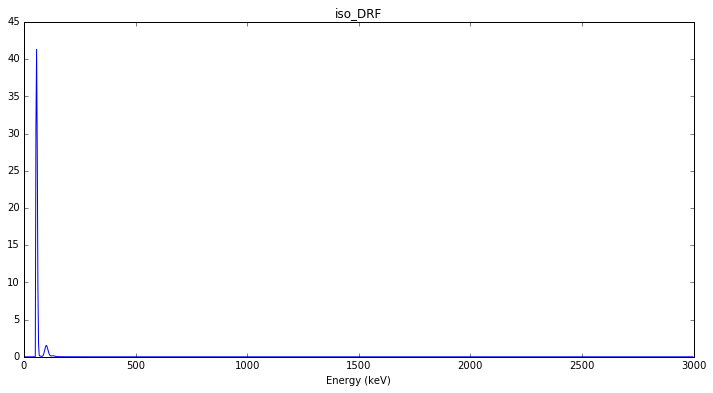

0.105525141444


In [5]:
isotope='Am241'
iso_DRF,a=generate_isotope(isotope,DRF,DRF_energies)


    
# Plot
x=DRF_bins*1000
y=np.abs(iso_DRF)
y[0:20]=0
%matplotlib inline
fig=plt.figure(figsize=(12,6))
ax= fig.add_subplot(111)
ax.plot(x,y)
#ax.plot(y[0:100])
ax.set_xlabel('Energy (keV)')
ax.set_title('iso_DRF')
plt.show()

print a

In [6]:
detector_efficiency(1332)

0.047624830106198127

In [7]:
np.max(y[200:300])/np.max(y[0:100])

1.0724985488706171e-05

(40, 1100)

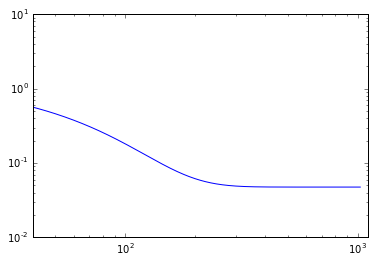

In [8]:

zz =  1.27605*np.exp(-np.linspace(0,3000,1024)*0.0077)+0.04758
plt.loglog(zz)
plt.xlim([40,1100])

In [9]:
def peak_to_all(energy):
        peak_to_all_ratio = 4.4177E-14*np.power(energy,4)-3.72588E-10*np.power(energy,3)+1.165366E-6*np.power(energy,2)-0.0016817*energy+1.2003106
        if peak_to_all_ratio > 1:
            peak_to_all_ratio=1
    
        return peak_to_all_ratio
        
        
    
    
    

isotope_path='Isotopes/'+'Ba133'+'.csv'
raw_iso=np.genfromtxt(isotope_path,delimiter=',')

iso_en=raw_iso[:,-3]/1000.
iso_BR=raw_iso[:,-1]
iso_DRF=np.zeros(1026)

counts_in_peak = 0

for i in range(iso_en.size):
    energy=iso_en[i]
    BR=iso_BR[i]
    eff=detector_efficiency(energy*1000)
    print peak_to_all(energy*1000),BR/100.0,eff
    iso_DRF=iso_DRF+get_DRF(energy,DRF_energies,DRF)*BR*eff

    counts_in_peak += (BR/100.0)*eff*peak_to_all(energy*1000)



# SET THE LLD
iso_DRF[0:10]=0


1 0.0024 0.08
1 0.00111 0.08
1 0.067 0.08
1 0.065 0.08
1 0.0091 0.08
1 0.356 0.08
1 0.657 0.08
1 0.18 0.08
1 0.0439 0.08
1 0.0217 0.2
1 0.0318 0.2
1 0.342 0.2
0.958771818721 0.006 0.418096118343
0.87892971091 0.0046 0.276317863747
0.816922795629 0.0709 0.199497414585
0.787914174673 0.184 0.171492038641
0.733219351258 0.622 0.129876810147
0.706391192699 0.0892 0.113996727709


In [10]:
counts_in_peak

0.29597512708498974

1.4199581460195651e-09

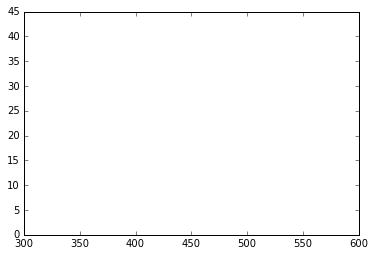

In [11]:
plt.plot(y)
plt.xlim([300,600])

np.sum(y[350:500])/np.sum(y)

(100, 200)

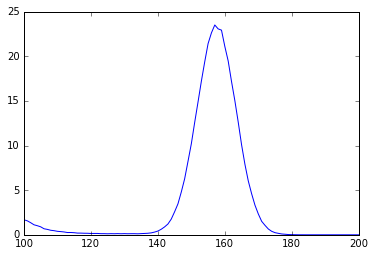

In [12]:
iso_DRF = get_DRF(450.0/1000.0,DRF_energies,DRF)
iso_DRF[0:10]=0
plt.plot(iso_DRF)
plt.xlim([100,200])



In [13]:

peak = np.sum(iso_DRF[130:180])
all_spec = np.sum(iso_DRF)

peak_to_total = peak/(all_spec)
print peak_to_total

0.644536809385


In [14]:
def peak_to_all(energy):
    peak_to_all_ratio = 4.4177E-14*np.power(energy,4)-3.72588E-10*np.power(energy,3)+1.165366E-6*np.power(energy,2)-0.0016817*energy+1.2003106
    if peak_to_all_ratio > 1:
        peak_to_all_ratio=1
    
    return peak_to_all_ratio
        
        
    

In [15]:
peak_to_all(450)

0.6473916666062499

In [16]:
Test_Eu500s = np.empty(1024)

file_name = "Eu152_500s000.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        Test_Eu500s[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int


In [17]:
Test_Ra500s = np.empty(1024)

file_name = "Ra_500s000.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        Test_Ra500s[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int


In [18]:
Test_Ba500s = np.empty(1024)

file_name = "Ba133_500s000.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        Test_Ba500s[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
                            

/home/ubuntu/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


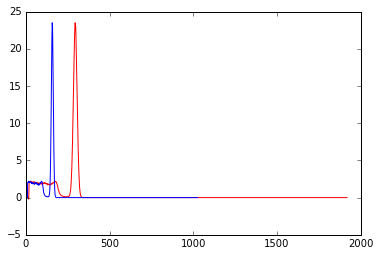

In [19]:
ugh = zoom(iso_DRF,1.87)
plt.plot(ugh,'r')
plt.plot(iso_DRF)

In [20]:
np.sum(spec)

59682.0

In [21]:
iso_DRF_0=generate_isotope('Am241',DRF,DRF_energies)
iso_DRF_1=generate_isotope('Ba133',DRF,DRF_energies)
iso_DRF_2=generate_isotope('Co60',DRF,DRF_energies)
iso_DRF_3=generate_isotope('Cs137',DRF,DRF_energies)
iso_DRF_4=generate_isotope('Eu152',DRF,DRF_energies)
iso_DRF_5=generate_isotope('K40',DRF,DRF_energies)
iso_DRF_6=generate_isotope('Ra226',DRF,DRF_energies)


(0, 100)

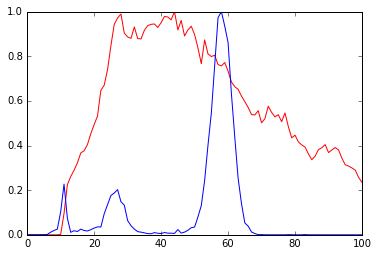

In [22]:
spec_Ra_test =np.abs(zoom(sample_spectrum(iso_DRF_6[0],10000)[2:],0.90))

plt.plot((Test_Ra500s/np.max(Test_Ra500s[0:]))[0:],'r')

plt.plot((spec_Ra_test/np.max(spec_Ra_test))[0:])
plt.xlim([0,100])

In [23]:
x[60]

170.87

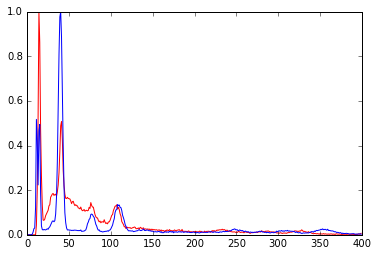

In [24]:
spec_Eu_test =np.abs(zoom(sample_spectrum(iso_DRF_4[0],100000)[2:],0.94))

plt.plot((Test_Eu500s/np.max(Test_Eu500s))[0:400],'r')

plt.plot((spec_Eu_test/np.max(spec_Eu_test))[0:400])

#plt.ylim([1E-5,1E1])

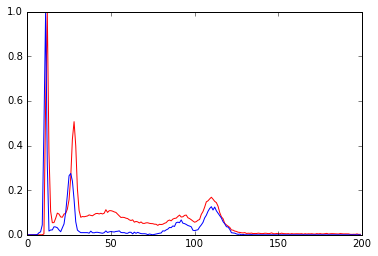

In [25]:
spec_Ba133_test =np.abs(zoom(sample_spectrum(iso_DRF_1[0],10000)[2:],0.90))

plt.plot((Test_Ba500s/np.max(Test_Ba500s))[0:200],'r')

plt.plot((spec_Ba133_test/np.max(spec_Ba133_test))[0:200])


In [26]:
peak_to_all(1332)

0.2864453248913452

(300, 500)

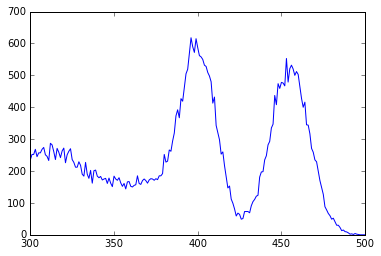

In [27]:
spec_Co60 =sample_spectrum(iso_DRF_2[0],100000)[2:]

plt.plot(spec_Co60)
plt.xlim([300,500])

In [28]:
np.sum(spec_Co60[375:500])/np.sum(spec_Co60)

0.33011000000000001

In [29]:
def results(res):
    print 'Am241: %s' %res[0] 
    print 'Ba133: %s' %res[1] 
    print 'Co57: %s'  %res[2] 
    print 'Co60: %s'  %res[3] 
    print 'Cr51: %s'  %res[4] 
    print 'Cs137: %s' %res[5] 
    print 'Eu152: %s' %res[6] 
    print 'Ga67: %s' %res[7] 
    print 'I123: %s' %res[8] 
    print 'I125: %s'  %res[9]
    
    print 'I131: %s' %res[10] 
    print 'In111: %s' %res[11] 
    print 'Ir192: %s'  %res[12] 
    print 'K40: %s'  %res[13] 
    print 'Lu177m: %s'  %res[14] 
    print 'Mo99: %s' %res[15] 
    print 'Np237: %s' %res[16] 
    print 'Pd103: %s' %res[17] 
    print 'Pu239: %s' %res[18] 
    print 'Pu240: %s'  %res[19]
    
    print 'Ra226: %s' %res[20] 
    print 'Se75: %s' %res[21] 
    print 'Sm153: %s'  %res[22] 
    print 'Sr89: %s'  %res[23] 
    print 'Tc99m: %s'  %res[24] 
    print 'Th232: %s' %res[25] 
    print 'Tl201: %s' %res[26] 
    print 'Tl204: %s' %res[27] 
    print 'U233: %s' %res[28] 
    print 'U235: %s'  %res[29]
    
    print 'U238: %s' %res[30] 
    print 'Xe133: %s'  %res[31]
    




In [37]:
np.max(sample_spectrum(iso_DRF_0[0],50))

27.0

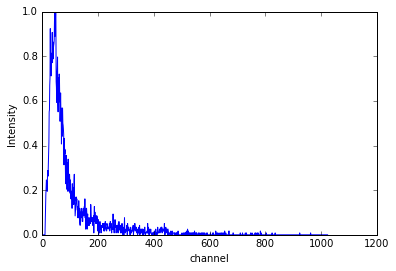

In [30]:
spec_Back3 = np.empty(1024)
file_name = "120sDECAYTEST001.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_Back3[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
        
spec_Back4 = np.empty(1024)
file_name = "120sDECAYTEST002.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_Back4[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
        
spec_Back5 = np.empty(1024)
file_name = "120sDECAYTEST003.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_Back5[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
        
        

spec_Back2 = np.empty(1024)
file_name = "120sDECAYTEST000.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_Back2[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
plt.plot(spec_Back2/np.max(spec_Back2))
plt.xlabel('channel')
plt.ylabel('Intensity')


BERP_unshielded_119cm_300s = np.empty(1024)
file_name = "BERP_unshielded_119cm_300s.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        BERP_unshielded_119cm_300s[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int




In [31]:
print np.sum(spec_Back2+spec_Back3+spec_Back4+spec_Back5)

30110.0


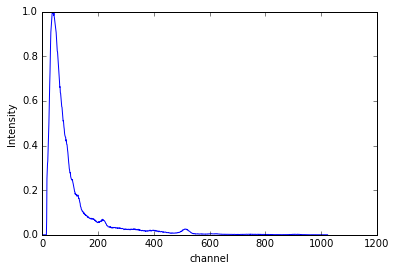

In [32]:
spec_Back = np.empty(1024)
file_name = "Background_long.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_Back[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int
plt.plot(spec_Back/np.max(spec_Back))
plt.xlabel('channel')
plt.ylabel('Intensity')


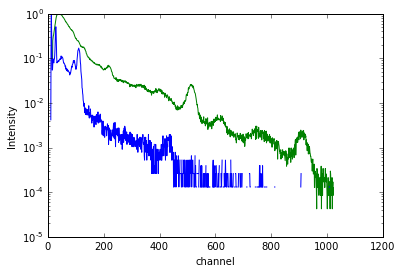

In [33]:

plt.semilogy(spec_Back/np.max(spec_Back),'g')
plt.semilogy(Test_Ba500s/np.max(Test_Ba500s))
plt.xlabel('channel')
plt.ylabel('Intensity')


In [34]:
spec_CoCs1 = np.empty(1024)

file_name = "CoCs1.Spe"
with open(file_name) as f:

    # read each spectra into a temp file, total of 1024 channels in this spectra
    content = f.readlines() # read all of the .Spe file into contnet 
    for i in range(1024):
        spec_CoCs1[i] = int(content[12+i]) # spectra begins at index 12, int to convert string in .Spe to int


In [35]:
7000.0/30010

0.2332555814728424

In [69]:
print('CPS background')
print np.sum(spec_Back5)/120.0
print '\n'

# spec is 200s CoCs equal mix
print ('CPS CoCs')
print np.sum(spec)/200.0
print '\n'

print (np.sum(spec)/200.0 - np.sum(spec_Back5)/120.0)/2.0


CPS background
63.1666666667


CPS CoCs
298.41


117.621666667


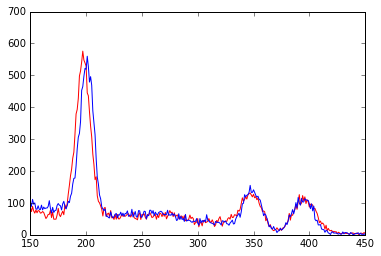

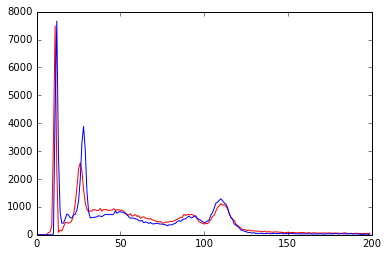

In [54]:
spec_Back_long = spec_Back2+spec_Back3+spec_Back4+spec_Back5

spec_Back1_sampled =sample_spectrum(spec_Back/np.max(spec_Back),25000)
spec_CoCs_sampled = np.abs(zoom(sample_spectrum(iso_DRF_2[0],20400)[2:]+sample_spectrum(iso_DRF_3[0],20400)[2:],0.87) )
spec_CoCs_sampled = np.lib.pad(spec_CoCs_sampled, (0,1024-spec_CoCs_sampled.shape[0]), 'constant', constant_values=0).astype(int)


spec_Back_sampled =sample_spectrum(spec_Back/np.max(spec_Back),5.0/2.0*25000.0)
spec_Ba_sampled = np.abs(zoom(sample_spectrum(iso_DRF_1[0],50000)[2:],0.90) )
spec_Ba_sampled = np.lib.pad(spec_Ba_sampled, (0,1024-spec_Ba_sampled.shape[0]), 'constant', constant_values=0).astype(int)

spec_CoCs_sampled[0:30]=0

plt.plot((spec_Back1_sampled+spec_CoCs_sampled),'r')
plt.plot(spec)
#plt.plot(spec_CoCs1)
plt.xlim([150,450])
#plt.ylim([0,100])

plt.figure()
plt.plot((spec_Back_sampled+spec_Ba_sampled)[0:200],'r')
plt.plot(Test_Ba500s[0:200])

17796.0

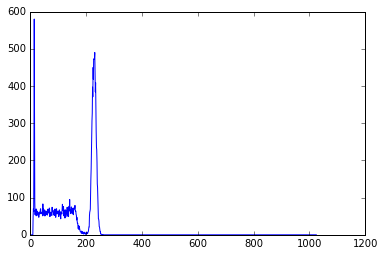

In [37]:
qq = sample_spectrum(iso_DRF_3[0],20000)

plt.plot(qq)

np.sum(qq[30:])

(0, 500)

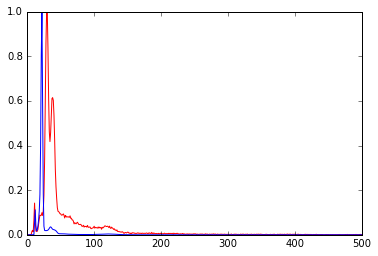

In [94]:
spec_Back_sampled =sample_spectrum(spec_Back/np.max(spec_Back),5.0/2.0*1.0)
spec_Eu_sampled = np.abs(zoom(sample_spectrum(iso_DRF_18[0],45000)[2:],0.91) )
spec_Eu_sampled = np.lib.pad(spec_Eu_sampled, (0,1024-spec_Eu_sampled.shape[0]), 'constant', constant_values=0).astype(int)



plt.plot((spec_Back1_sampled+spec_Eu_sampled)/np.max(spec_Back1_sampled+spec_Eu_sampled),'r')
plt.plot(BERP_unshielded_119cm_300s/np.max(BERP_unshielded_119cm_300s))
plt.xlim(0,500)

In [37]:



spec_Back_sampled =sample_spectrum(spec_Back/np.max(spec_Back),5.0/2.0*55000.0)
spec_Ra_sampled = np.abs(zoom(sample_spectrum(iso_DRF_6[0],5000)[2:],0.86) )
spec_Ra_sampled = np.lib.pad(spec_Ra_sampled, (0,1024-spec_Ra_sampled.shape[0]), 'constant', constant_values=0).astype(int)


plt.plot(spec_Back1_sampled[0:100],'g')
plt.plot((spec_Back1_sampled+spec_Ra_sampled)[0:100],'r')
plt.plot(Test_Ra500s[0:100])


NameError: name 'spec_Back1_sampled' is not defined

In [25]:
Background_measure_time = np.random.uniform(10,200) # measured in seconds

DRF_perturb = np.random.uniform(0.82,0.94)
back_perturb = np.random.uniform(1000,100000)




spec_Back_sampled1 =sample_spectrum(spec_Back/np.max(spec_Back),125*500)

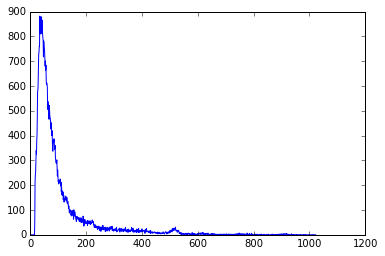

In [26]:
plt.plot(spec_Back_sampled1)

In [36]:
samples = 1000000
execfile('gen_rand_samples.py')

114214

KeyboardInterrupt: 

Am241: 0.0
Ba133: 0.0
Co57: 0.0
Co60: 0.0
Cr51: 0.0
Cs137: 0.0
Eu152: 0.0
Ga67: 0.0
I123: 0.0
I125: 0.0
I131: 0.206496815287
In111: 0.0
Ir192: 0.0
K40: 0.234012738854
Lu177m: 0.0
Mo99: 0.0
Np237: 0.0
Pd103: 0.0
Pu239: 0.0
Pu240: 0.0
Ra226: 0.0
Se75: 0.0
Sm153: 0.0
Sr89: 0.0
Tc99m: 0.274777070064
Th232: 0.0
Tl201: 0.284713375796
Tl204: 0.0
U233: 0.0
U235: 0.0
U238: 0.0
Xe133: 0.0


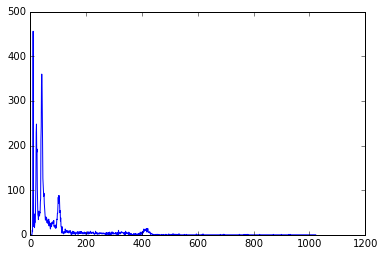

In [29]:
index = 12

plt.plot(Train_spectra[index,0:])
results(Train_spectra_key[index])




In [39]:
Train_spectra[0:10000].shape

(10000, 1024)

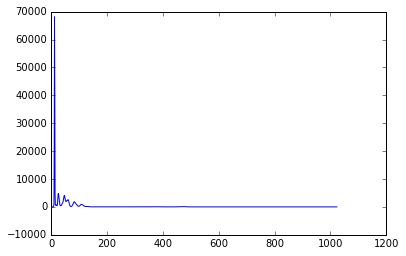

In [70]:
index = 3
#print results(Train_spectra_key[index])

plt.plot(Train_spectra[index])




In [37]:
np.save("ANSI_Trn_Set_1E5_V3", Train_spectra[0:100000])


In [38]:
np.save("ANSI_Trn_Set_key_1E5_V3", Train_spectra_key[0:100000])


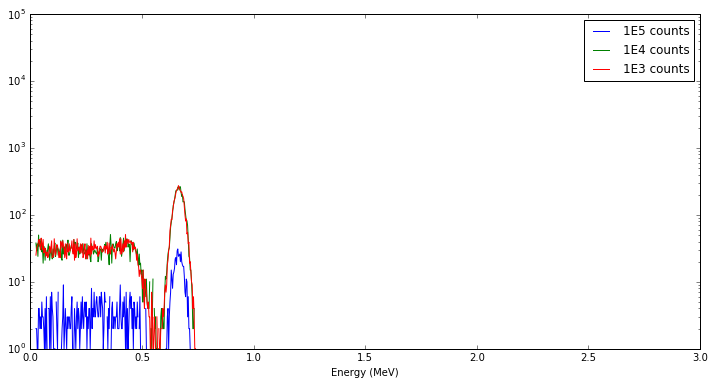

In [64]:
''' 
Sample the spectrum.   This can be done as simply as 

output= sample_spectrum(iso_DRF,100000)
Where 100000 is the number of counts to be used.

'''


%matplotlib inline
fig=plt.figure(num=None,figsize=(12,6),dpi=100)
ax= fig.add_subplot(111)
ax.semilogy(DRF_bins,sample_spectrum(iso_DRF,1000),label="1E5 counts")
ax.semilogy(DRF_bins,sample_spectrum(iso_DRF,10000),label="1E4 counts")
ax.semilogy(DRF_bins,sample_spectrum(iso_DRF,10000),label="1E3 counts")

plt.legend()
ax.set_xlabel('Energy (MeV)')
ax.set_ylim([1, 100000])
plt.show()

In [4]:

num_samples = 1000

spectra_all = np.empty([num_samples,1024]) 


for i in range(num_samples):
    
    spectra_all[i] = sample_spectrum(iso_DRF,100000)[2:]
    print i,
    print '\1b[2k\r',
    

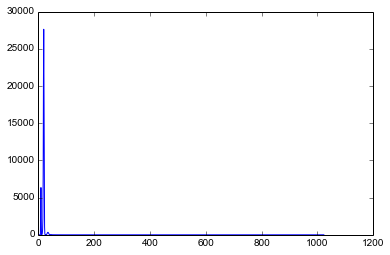

In [5]:
plt.plot(spectra_all[5])

In [6]:
#np.save("Am241_1000_1E5", spectra_all)


In [130]:
test2 = sample_spectrum(iso_DRF,0.15*273443)

In [125]:
#test = sample_spectrum(iso_DRF,0.58*273443)

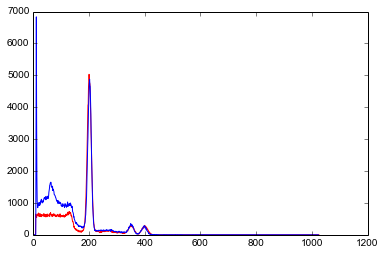

In [134]:
plt.plot((test+test2),'r')
plt.plot(spec)